![delensalot logo](./../../res/dlensalot2.PNG)

# Interactive minimal working example - generate simulations
In this notebook, you generate lensed CMB simulations on the full sky inclusive of isotropic white noise and without foregrounds.
At the end of this tutorial, you will plot the power spectra of the CMB and lensing potential realizations.

All parameters are set via a configuration file [here](https://github.com/NextGenCMB/delensalot/blob/main/notebooks/examples/conf_mwe_simgen.py), and you can freely change the parameters to your liking.
If not set, attributes default to the 'P_FS_CMBS4'-default configuration 'DL_DEFAULT_CMBS4_FS_P' [here](https://github.com/NextGenCMB/delensalot/blob/simgenjob/delensalot/lerepi/core/metamodel/__init__.py).

The configuration file consists of,
 * `DLENSALOT_Job` delensalot can do a few things, and here we choose one of its sub routines, `generate_sim`
 * `DLENSALOT_Analysis` collects all configurations for the analysis of the simulations
 * `DLENSALOT_Data` configures the simulations which are used. In this minimal working example, we generate the simulation data on the fly and therefore need to choose the simulation module and a few parameters for this

In [7]:
from IPython.display import clear_output
from datetime import datetime
import os
from os.path import join as opj
if "SCRATCH" not in os.environ:
    os.environ["SCRATCH"] = "/mnt/c/Users/sebas/OneDrive/SCRATCH"

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

from delensalot.run import run

fn = opj(os.getcwd(), 'conf_simgen.py')

In [21]:
drun = run(config=fn, job_id='generate_sim', verbose=False)
ana_mwe = drun.run()
ana_mwe = ana_mwe.job

clear_output(wait=True)
print("Cell finished {}".format(datetime.now().strftime("%H:%M:%S")))

Cell finished 17:35:32


# Plot your results
All products are easily accessible, and all simulation-objects and functions are stored in the `_sims`-attribute.

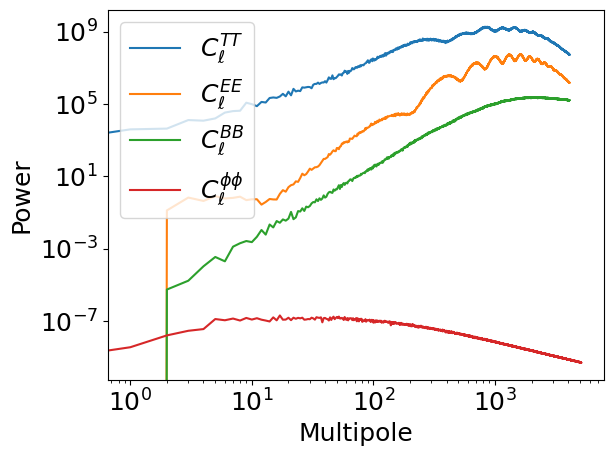

In [22]:
ll = np.arange(0,ana_mwe._sims.lmax+1,1)
LL = np.arange(0,ana_mwe._sims.lmax+ana_mwe._sims.dlmax+1,1)
scale_factor_l = (ll*(ll+1))**2/(2*np.pi)
scale_factor_L = (LL*(LL+1))**2/(2*np.pi)

plt.plot(scale_factor_l*hp.alm2cl(ana_mwe._sims.get_sim_tlm(0)), label=r'$C_\ell^{TT}$')
plt.plot(scale_factor_l*hp.alm2cl(ana_mwe._sims.get_sim_elm(0)), label=r'$C_\ell^{EE}$')
plt.plot(scale_factor_l*hp.alm2cl(ana_mwe._sims.get_sim_blm(0)), label=r'$C_\ell^{BB}$')
plt.plot(scale_factor_L*hp.alm2cl(ana_mwe._sims.get_sim_plm(0)), label=r'$C_\ell^{\phi\phi}$')


plt.xlabel('Multipole')
plt.ylabel('Power')
plt.loglog()
plt.legend()

This concludes the tutorial. If you'd like to see how to delens the simulations you generate, go check out [this notebook](https://github.com/NextGenCMB/delensalot/blob/main/notebooks/examples/interactive_mwe.py).

Please check out the other tutorials as well, or see the [documentation](link_to_rtd_doc), or [github](https://github.com/NextGenCMB/delensalot) for more.